In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [21]:
df = pd.read_csv('motor_veh.csv')
df

,year,category,type,number
0,2005,Cars & Station-wagons,Private cars,401638
1,2006,Cars & Station-wagons,Private cars,421904
2,2007,Cars & Station-wagons,Private cars,451745
3,2008,Cars & Station-wagons,Private cars,476634
4,2009,Cars & Station-wagons,Private cars,497116
5,2010,Cars & Station-wagons,Private cars,511125
6,2011,Cars & Station-wagons,Private cars,520614
7,2012,Cars & Station-wagons,Private cars,535233
8,2013,Cars & Station-wagons,Private cars,540063
9,2014,Cars & Station-wagons,Private cars,536882


In [22]:
details = df[['year','number']]

In [23]:
msk = np.random.rand(len(df)) < 0.8
train = details[msk]
test = details[~msk]

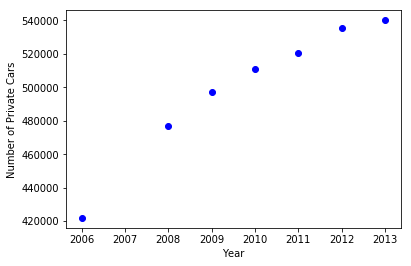

In [24]:
plt.scatter(train.year, train.number,  color='blue')
plt.xlabel("Year")
plt.ylabel("Number of Private Cars")
plt.show()

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['year']])
train_y = np.asanyarray(train[['number']])
regr.fit (train_x, train_y)

Coefficients:  [[16457.26229508]]
Intercept:  [-32576362.03278689]


Text(0,0.5,'Emission')

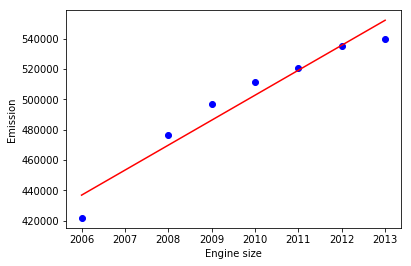

In [26]:
plt.scatter(train.year, train.number,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Year")
plt.ylabel("Number of Private Cars")

In [27]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['year']])
test_y = np.asanyarray(test[['number']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 17370.50
Residual sum of squares (MSE): 453410550.31
R2-score: 0.89
